# Keras Clasificación binaria

# 1.Importación librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Importación fuente de datos

In [2]:
# Leer datos históricos
df = pd.read_excel("./src/Heart_diagnosis.xlsx", sheet_name="heart")

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 3.Análisis de Datos (EDA) + Preprocesado

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## 3.1 Limpieza inicial

In [5]:
# Verificar la existencia de datos nulos
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Eliminar variables con un alto porcentaje de nulos
df_var = df.isnull().sum()
# Porcentaje de nulos aceptado
percent = 0.1
break_point = len(df) * percent
# Quitar variables con alto porcentaje de nulos
df_var = df_var[ df_var<break_point ]
indices = df_var.index
df = df[indices]

In [8]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
# Eliminar registros con posibles valores erróneos
df.dropna(inplace=True)
# Verificar que tan limpio quedó el DataFrame
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# Ver estadística de cada columna
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## 3.2 Visualización

### 3.2.1 Plots básicos

<AxesSubplot:xlabel='target', ylabel='count'>

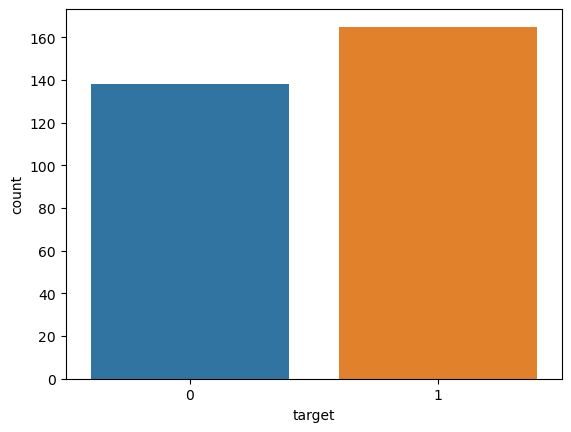

In [11]:
# Verificar si hay una proporción equilibrada entre 0 y 1 para 
# un buen modelado posterior
sns.countplot(x="target", data=df)

<AxesSubplot:>

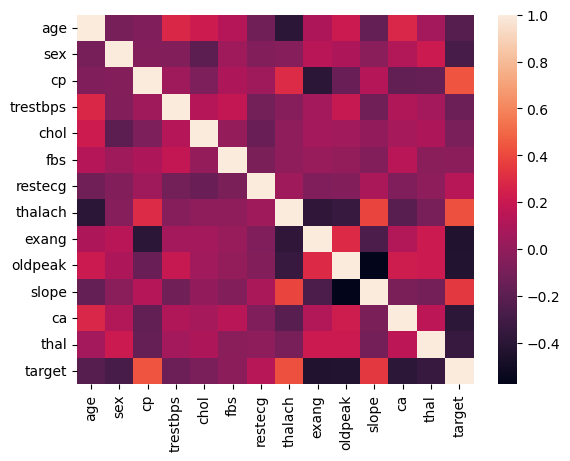

In [12]:
sns.heatmap(df.corr())

In [13]:
df.corr()["target"].sort_values()

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

<AxesSubplot:>

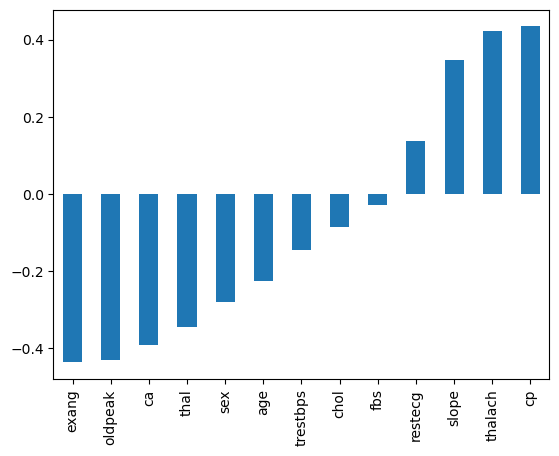

In [14]:
# Quitamos variable objetivo
df.corr()["target"][:-1].sort_values().plot(kind="bar")

<AxesSubplot:xlabel='target', ylabel='cp'>

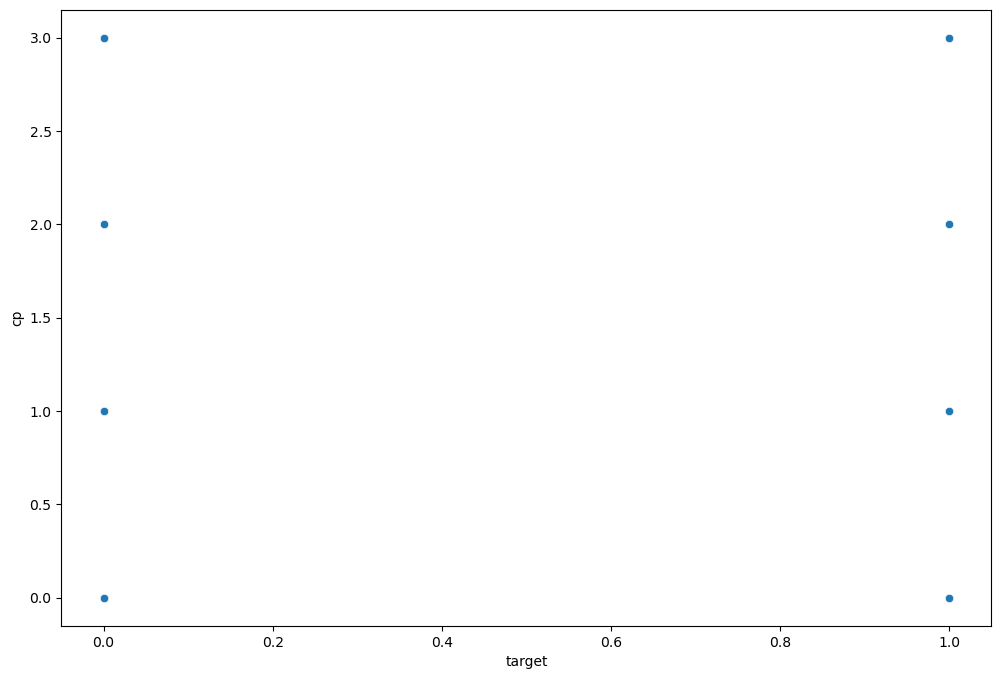

In [20]:
# Ver columnas altamente correlacionadas con la salida
plt.figure( figsize=(12, 8) )
sns.scatterplot(x="target", y="cp", data=df)

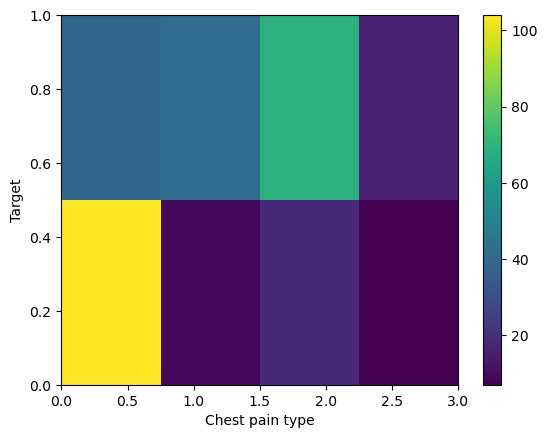

In [21]:
# Si los calores están normalizados, lo mejor es visualizar un histograma 2D
plt.hist2d( df["cp"], df["target"], bins=(4,2), cmap=plt.cm.viridis )
plt.xlabel("Chest pain type")
plt.ylabel("Target")
plt.colorbar()

### 3.2.3 Otras variables

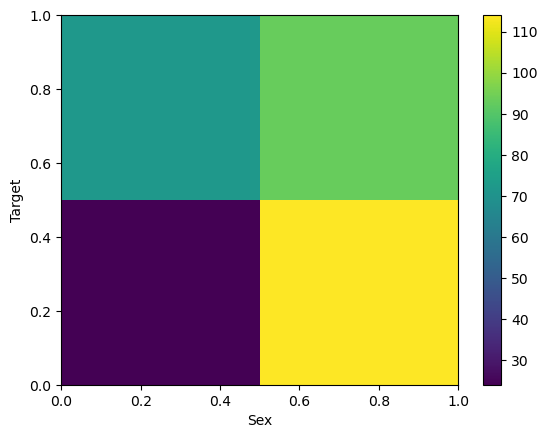

In [23]:
plt.hist2d( df["sex"], df["target"], bins=(2,2), cmap=plt.cm.viridis )
plt.xlabel("Sex")
plt.ylabel("Target")
plt.colorbar()

## 3.3 Limpieza final

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [25]:
# Se puede eliminar fbs porque tiene una correlación muy baja
df.corr()["target"].sort_values()

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

# 4.Train Test Split

In [26]:
x = df.drop("target", axis=1).values
y = df["target"].values

In [27]:
x.shape

(303, 13)

In [28]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [32]:
x_train.shape

(227, 13)

In [33]:
x_test.shape

(76, 13)

# 5.Escalado

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
scaler.fit(x_train)

MinMaxScaler()

In [38]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [39]:
x_train.shape

(227, 13)

In [40]:
x_test.shape

(76, 13)

In [41]:
x_train

array([[0.79166667, 1.        , 0.        , ..., 0.5       , 0.        ,
        0.66666667],
       [0.70833333, 1.        , 0.        , ..., 1.        , 0.75      ,
        1.        ],
       [0.29166667, 1.        , 0.        , ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.35416667, 1.        , 0.33333333, ..., 1.        , 0.        ,
        1.        ],
       [0.25      , 1.        , 0.33333333, ..., 0.5       , 0.        ,
        0.33333333],
       [0.39583333, 0.        , 0.66666667, ..., 1.        , 0.        ,
        0.66666667]])

In [42]:
x_test.max()

1.0

# 6.Creación del modelo

    # Para un problema de clasificación binario
    model.compile(optimizer='rmsprop', # o "adam"
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [47]:
x_train.shape

(227, 13)

In [49]:
model = Sequential()
# Elegir número de neuronas
neuronas = x_train.shape[1]
# Agregar capas
model.add( Dense(units=neuronas, activation="relu") )
model.add( Dense(units=np.round(neuronas/2), activation="relu") )
# Indicar número de neuronas de salida
model.add( Dense(units=1, activation="sigmoid") )

model.compile( optimizer="adam", loss="binary_crossentropy" )

# 7. Entrenamiento del modelo

### Ejemplo 1: Valor alto de epochs y overfitting

In [51]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(
    x=x_train,
    y=y_train,
    epochs=600,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/600
8/8 [==============================] - 1s 15ms/step - loss: 0.8950 - val_loss: 0.7766
Epoch 2/600
8/8 [==============================] - 0s 3ms/step - loss: 0.8045 - val_loss: 0.7149
Epoch 3/600
8/8 [==============================] - 0s 3ms/step - loss: 0.7316 - val_loss: 0.6732
Epoch 4/600
8/8 [==============================] - 0s 3ms/step - loss: 0.6831 - val_loss: 0.6466
Epoch 5/600
8/8 [==============================] - 0s 3ms/step - loss: 0.6550 - val_loss: 0.6325
Epoch 6/600
8/8 [==============================] - 0s 3ms/step - loss: 0.6358 - val_loss: 0.6246
Epoch 7/600
8/8 [==============================] - 0s 3ms/step - loss: 0.6266 - val_loss: 0.6165
Epoch 8/600
8/8 [==============================] - 0s 3ms/step - loss: 0.6163 - val_loss: 0.6068
Epoch 9/600
8/8 [==============================] - 0s 3ms/step - loss: 0.6070 - val_loss: 0.5961
Epoch 10/600
8/8 [==============================] - 0s 3ms/step - loss: 0.5977 - val_loss: 0.5855
Epoch 11/600
8/8 [==========

8/8 [==============================] - 0s 3ms/step - loss: 0.3582 - val_loss: 0.3605
Epoch 85/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3583 - val_loss: 0.3604
Epoch 86/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3574 - val_loss: 0.3558
Epoch 87/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3598 - val_loss: 0.3543
Epoch 88/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3584 - val_loss: 0.3558
Epoch 89/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3569 - val_loss: 0.3556
Epoch 90/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3568 - val_loss: 0.3556
Epoch 91/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3563 - val_loss: 0.3598
Epoch 92/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3545 - val_loss: 0.3611
Epoch 93/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3539 - val_loss: 0.3587
Epoch 94/600
8/8 [===============

8/8 [==============================] - 0s 3ms/step - loss: 0.3305 - val_loss: 0.3560
Epoch 168/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3300 - val_loss: 0.3544
Epoch 169/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3304 - val_loss: 0.3536
Epoch 170/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3328 - val_loss: 0.3539
Epoch 171/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3292 - val_loss: 0.3585
Epoch 172/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3281 - val_loss: 0.3604
Epoch 173/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3287 - val_loss: 0.3615
Epoch 174/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3314 - val_loss: 0.3702
Epoch 175/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3317 - val_loss: 0.3608
Epoch 176/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3301 - val_loss: 0.3543
Epoch 177/600
8/8 [=====

Epoch 250/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3083 - val_loss: 0.3526
Epoch 251/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3073 - val_loss: 0.3550
Epoch 252/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3064 - val_loss: 0.3563
Epoch 253/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3069 - val_loss: 0.3571
Epoch 254/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3059 - val_loss: 0.3543
Epoch 255/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3060 - val_loss: 0.3517
Epoch 256/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3073 - val_loss: 0.3504
Epoch 257/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3066 - val_loss: 0.3568
Epoch 258/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3084 - val_loss: 0.3654
Epoch 259/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3078 - val_loss: 0.3598
Epoch 260/

8/8 [==============================] - 0s 3ms/step - loss: 0.2879 - val_loss: 0.3538
Epoch 333/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2876 - val_loss: 0.3586
Epoch 334/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2870 - val_loss: 0.3600
Epoch 335/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2880 - val_loss: 0.3478
Epoch 336/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2909 - val_loss: 0.3488
Epoch 337/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2856 - val_loss: 0.3637
Epoch 338/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2855 - val_loss: 0.3556
Epoch 339/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2851 - val_loss: 0.3527
Epoch 340/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2846 - val_loss: 0.3525
Epoch 341/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2846 - val_loss: 0.3521
Epoch 342/600
8/8 [=====

Epoch 415/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2716 - val_loss: 0.3360
Epoch 416/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2679 - val_loss: 0.3455
Epoch 417/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2630 - val_loss: 0.3633
Epoch 418/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2696 - val_loss: 0.3718
Epoch 419/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2691 - val_loss: 0.3618
Epoch 420/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2653 - val_loss: 0.3588
Epoch 421/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2642 - val_loss: 0.3531
Epoch 422/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2643 - val_loss: 0.3497
Epoch 423/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2636 - val_loss: 0.3509
Epoch 424/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2637 - val_loss: 0.3617
Epoch 425/

8/8 [==============================] - 0s 3ms/step - loss: 0.2456 - val_loss: 0.3726
Epoch 498/600
8/8 [==============================] - 0s 4ms/step - loss: 0.2464 - val_loss: 0.3594
Epoch 499/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2447 - val_loss: 0.3539
Epoch 500/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2463 - val_loss: 0.3524
Epoch 501/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2460 - val_loss: 0.3544
Epoch 502/600
8/8 [==============================] - 0s 4ms/step - loss: 0.2509 - val_loss: 0.3558
Epoch 503/600
8/8 [==============================] - 0s 4ms/step - loss: 0.2483 - val_loss: 0.3606
Epoch 504/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2470 - val_loss: 0.3694
Epoch 505/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2440 - val_loss: 0.3716
Epoch 506/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2451 - val_loss: 0.3772
Epoch 507/600
8/8 [=====

Epoch 580/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2336 - val_loss: 0.3674
Epoch 581/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2299 - val_loss: 0.3849
Epoch 582/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2283 - val_loss: 0.3857
Epoch 583/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2279 - val_loss: 0.3755
Epoch 584/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2269 - val_loss: 0.3779
Epoch 585/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2268 - val_loss: 0.3822
Epoch 586/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2282 - val_loss: 0.3878
Epoch 587/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2271 - val_loss: 0.3733
Epoch 588/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2278 - val_loss: 0.3733
Epoch 589/600
8/8 [==============================] - 0s 3ms/step - loss: 0.2269 - val_loss: 0.3825
Epoch 590/

In [52]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

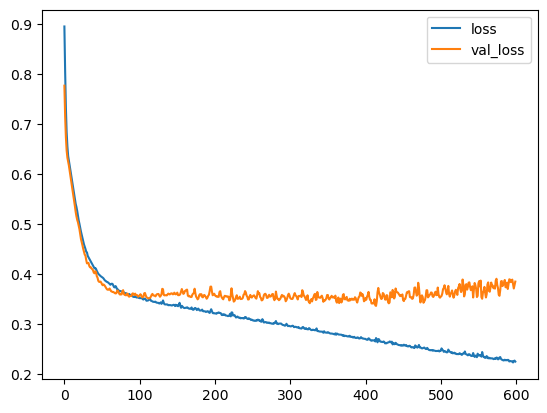

In [53]:
model_loss.plot()

### Ejemplo 2: Early Stopping

Aplicar early stopping para seguir a val_loss y parar en base a la condición indicada

In [54]:
model = Sequential()
# Elegir número de neuronas
neuronas = x_train.shape[1]
# Agregar capas
model.add( Dense(units=neuronas, activation="relu") )
model.add( Dense(units=np.round(neuronas/2), activation="relu") )
# Indicar número de neuronas de salida
model.add( Dense(units=1, activation="sigmoid") )

model.compile( optimizer="adam", loss="binary_crossentropy" )

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

Parar el entrenamiento cuando un valor monitorizado (pérdidas) deja de mejorar:

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [56]:
early_stop = EarlyStopping( monitor="val_loss", mode="min", verbose=1, patience=25 )

In [58]:
model.fit(
    x=x_train,
    y=y_train,
    epochs=600,
    validation_data=(x_test, y_test),
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/600
8/8 [==============================] - 0s 11ms/step - loss: 0.7144 - val_loss: 0.7351
Epoch 2/600
8/8 [==============================] - 0s 3ms/step - loss: 0.7077 - val_loss: 0.7257
Epoch 3/600
8/8 [==============================] - 0s 3ms/step - loss: 0.7020 - val_loss: 0.7184
Epoch 4/600
8/8 [==============================] - 0s 3ms/step - loss: 0.6974 - val_loss: 0.7117
Epoch 5/600
8/8 [==============================] - 0s 3ms/step - loss: 0.6926 - val_loss: 0.7059
Epoch 6/600
8/8 [==============================] - 0s 3ms/step - loss: 0.6888 - val_loss: 0.7000
Epoch 7/600
8/8 [==============================] - 0s 3ms/step - loss: 0.6843 - val_loss: 0.6952
Epoch 8/600
8/8 [==============================] - 0s 3ms/step - loss: 0.6808 - val_loss: 0.6907
Epoch 9/600
8/8 [==============================] - 0s 3ms/step - loss: 0.6772 - val_loss: 0.6873
Epoch 10/600
8/8 [==============================] - 0s 3ms/step - loss: 0.6738 - val_loss: 0.6838
Epoch 11/600
8/8 [==========

8/8 [==============================] - 0s 3ms/step - loss: 0.3696 - val_loss: 0.3600
Epoch 85/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3668 - val_loss: 0.3571
Epoch 86/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3674 - val_loss: 0.3593
Epoch 87/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3662 - val_loss: 0.3607
Epoch 88/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3652 - val_loss: 0.3598
Epoch 89/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3645 - val_loss: 0.3595
Epoch 90/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3642 - val_loss: 0.3589
Epoch 91/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3639 - val_loss: 0.3657
Epoch 92/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3655 - val_loss: 0.3691
Epoch 93/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3660 - val_loss: 0.3663
Epoch 94/600
8/8 [===============

8/8 [==============================] - 0s 3ms/step - loss: 0.3306 - val_loss: 0.3434
Epoch 168/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3306 - val_loss: 0.3424
Epoch 169/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3323 - val_loss: 0.3425
Epoch 170/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3305 - val_loss: 0.3428
Epoch 171/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3313 - val_loss: 0.3456
Epoch 172/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3286 - val_loss: 0.3444
Epoch 173/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3285 - val_loss: 0.3448
Epoch 174/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3281 - val_loss: 0.3461
Epoch 175/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3277 - val_loss: 0.3492
Epoch 176/600
8/8 [==============================] - 0s 3ms/step - loss: 0.3312 - val_loss: 0.3604
Epoch 177/600
8/8 [=====

<AxesSubplot:>

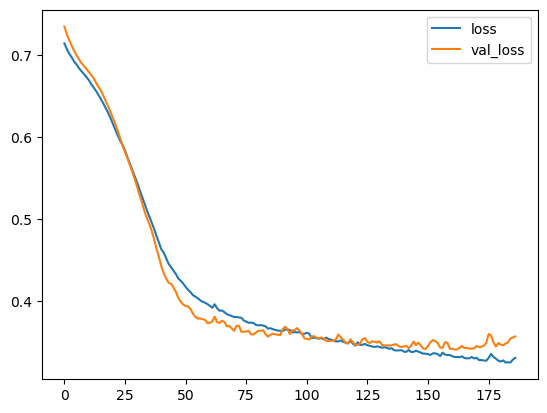

In [59]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### Ejemplo 3: Añadir DropOut Layers
    #Solo algunas neuronas se actualizarán en cada epoch, permitiendo que solo se ajusten algunos pesos (w) y bias (b) en cada iteración de manera independiente (reduce overfitting)

In [82]:
from tensorflow.keras.layers import Dropout

In [84]:
model = Sequential()
# Elegir número de neuronas
neuronas = x_train.shape[1]
# Agregar capas
model.add( Dense(units=neuronas, activation="relu") )
# la mitad de las neuronas en cada epoch para esta capa
model.add( Dropout(0.5) )
model.add( Dense(units=np.round(neuronas/2), activation="relu") )
# la mitad de las neuronas en cada epoch para esta capa
model.add( Dropout(0.5) )
# Indicar número de neuronas de salida
model.add( Dense(units=1, activation="sigmoid") )

model.compile( optimizer="adam", loss="binary_crossentropy" )

In [85]:
model.fit(
    x=x_train,
    y=y_train,
    epochs=600,
    validation_data=(x_test, y_test),
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/600
8/8 [==============================] - 0s 11ms/step - loss: 0.7537 - val_loss: 0.7191
Epoch 2/600
8/8 [==============================] - 0s 3ms/step - loss: 0.7402 - val_loss: 0.7142
Epoch 3/600
8/8 [==============================] - 0s 3ms/step - loss: 0.7382 - val_loss: 0.7099
Epoch 4/600
8/8 [==============================] - 0s 3ms/step - loss: 0.7539 - val_loss: 0.7050
Epoch 5/600
8/8 [==============================] - 0s 3ms/step - loss: 0.7296 - val_loss: 0.7005
Epoch 6/600
8/8 [==============================] - 0s 3ms/step - loss: 0.7019 - val_loss: 0.6966
Epoch 7/600
8/8 [==============================] - 0s 3ms/step - loss: 0.7055 - val_loss: 0.6931
Epoch 8/600
8/8 [==============================] - 0s 3ms/step - loss: 0.6904 - val_loss: 0.6908
Epoch 9/600
8/8 [==============================] - 0s 3ms/step - loss: 0.6907 - val_loss: 0.6894
Epoch 10/600
8/8 [==============================] - 0s 3ms/step - loss: 0.7017 - val_loss: 0.6873
Epoch 11/600
8/8 [==========

8/8 [==============================] - 0s 3ms/step - loss: 0.6179 - val_loss: 0.5390
Epoch 85/600
8/8 [==============================] - 0s 3ms/step - loss: 0.6135 - val_loss: 0.5447
Epoch 86/600
8/8 [==============================] - 0s 3ms/step - loss: 0.5894 - val_loss: 0.5446
Epoch 87/600
8/8 [==============================] - 0s 3ms/step - loss: 0.6076 - val_loss: 0.5425
Epoch 88/600
8/8 [==============================] - 0s 3ms/step - loss: 0.5737 - val_loss: 0.5383
Epoch 89/600
8/8 [==============================] - 0s 3ms/step - loss: 0.5884 - val_loss: 0.5355
Epoch 90/600
8/8 [==============================] - 0s 3ms/step - loss: 0.5934 - val_loss: 0.5308
Epoch 91/600
8/8 [==============================] - 0s 3ms/step - loss: 0.5884 - val_loss: 0.5287
Epoch 92/600
8/8 [==============================] - 0s 3ms/step - loss: 0.5542 - val_loss: 0.5259
Epoch 93/600
8/8 [==============================] - 0s 3ms/step - loss: 0.5832 - val_loss: 0.5220
Epoch 94/600
8/8 [===============

8/8 [==============================] - 0s 3ms/step - loss: 0.5139 - val_loss: 0.4406
Epoch 168/600
8/8 [==============================] - 0s 3ms/step - loss: 0.4942 - val_loss: 0.4400
Epoch 169/600
8/8 [==============================] - 0s 3ms/step - loss: 0.5113 - val_loss: 0.4398
Epoch 170/600
8/8 [==============================] - 0s 3ms/step - loss: 0.4938 - val_loss: 0.4390
Epoch 171/600
8/8 [==============================] - 0s 3ms/step - loss: 0.5016 - val_loss: 0.4364
Epoch 172/600
8/8 [==============================] - 0s 3ms/step - loss: 0.4854 - val_loss: 0.4346
Epoch 173/600
8/8 [==============================] - 0s 3ms/step - loss: 0.5073 - val_loss: 0.4336
Epoch 174/600
8/8 [==============================] - 0s 3ms/step - loss: 0.4901 - val_loss: 0.4333
Epoch 175/600
8/8 [==============================] - 0s 3ms/step - loss: 0.5312 - val_loss: 0.4335
Epoch 176/600
8/8 [==============================] - 0s 3ms/step - loss: 0.4994 - val_loss: 0.4320
Epoch 177/600
8/8 [=====

Epoch 250/600
8/8 [==============================] - 0s 3ms/step - loss: 0.4532 - val_loss: 0.4182
Epoch 251/600
8/8 [==============================] - 0s 3ms/step - loss: 0.4923 - val_loss: 0.4179
Epoch 252/600
8/8 [==============================] - 0s 3ms/step - loss: 0.4763 - val_loss: 0.4174
Epoch 253/600
8/8 [==============================] - 0s 3ms/step - loss: 0.4675 - val_loss: 0.4177
Epoch 254/600
8/8 [==============================] - 0s 3ms/step - loss: 0.4519 - val_loss: 0.4164
Epoch 255/600
8/8 [==============================] - 0s 3ms/step - loss: 0.4597 - val_loss: 0.4152
Epoch 256/600
8/8 [==============================] - 0s 3ms/step - loss: 0.5043 - val_loss: 0.4153
Epoch 257/600
8/8 [==============================] - 0s 3ms/step - loss: 0.4970 - val_loss: 0.4207
Epoch 258/600
8/8 [==============================] - 0s 3ms/step - loss: 0.4771 - val_loss: 0.4223
Epoch 259/600
8/8 [==============================] - 0s 3ms/step - loss: 0.4679 - val_loss: 0.4226
Epoch 260/

<AxesSubplot:>

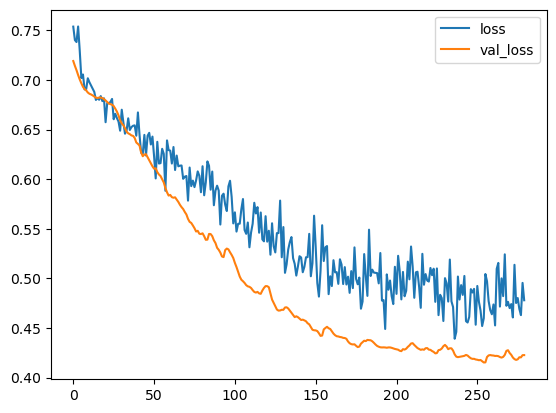

In [86]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# 8. Evaluación del modelo

In [87]:
from sklearn.metrics import classification_report, confusion_matrix

## 8.1 Predicción sobre el conjunto de Test

In [88]:
predictions = model.predict(x_test)

3/3 [==============================] - 0s 960us/step


In [96]:
print(
    classification_report( y_test, predictions.round() )
)

              precision    recall  f1-score   support

           0       0.93      0.68      0.78        37
           1       0.76      0.95      0.84        39

    accuracy                           0.82        76
   macro avg       0.84      0.81      0.81        76
weighted avg       0.84      0.82      0.81        76



In [98]:
print(
    confusion_matrix( y_test, predictions.round() )
)

[[25 12]
 [ 2 37]]


## 8.2 Predicción sobre nuevos datos

In [99]:
# Leer datos a predecir
df_pred = pd.read_excel("./src/Heart_diagnosis.xlsx", sheet_name="Datos_Predecir")
# Filtrar columnas importantes y limpias
df_pred = df_pred[df.columns]
# Variable de entrada de la predicción
x_pred = df_pred.drop("target", axis=1)
# Escalar entrada de predicción
x_pred = scaler.transform(x_pred)
# Predecir
resultado = model.predict(x_pred)
# Unir DataFrame de predicción con la nueva columna predicha
df_pred['prediccion'] = pd.DataFrame(resultado)
df_pred

1/1 [==============================] - 0s 13ms/step


/home/hisham/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,prediccion
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,NaN,0.724727
1,42,1,2,130,250,0,1,187,0,3.5,0,0,2,NaN,0.642374
2,40,0,1,130,204,0,0,172,0,1.4,2,0,2,NaN,0.728636
3,55,1,1,120,236,0,1,178,0,0.8,2,0,2,NaN,0.714224
4,62,0,0,120,354,0,1,163,1,0.6,2,0,2,NaN,0.633450
5,58,1,0,140,192,0,1,148,0,0.4,1,0,1,NaN,0.671544
6,55,0,1,140,294,0,0,153,0,1.3,1,0,2,NaN,0.728636
7,34,1,1,120,263,0,1,173,0,0.0,2,0,3,NaN,0.728636
8,50,1,2,172,199,1,1,162,0,0.5,2,0,3,NaN,0.728636
9,59,1,2,150,168,0,1,174,0,1.6,2,0,2,NaN,0.724773


In [100]:
# Guardar modelo para posterior uso
#from tensorflow.keras.models import load_model
model.save("models/hisham_model_predecir_corazon.h5")